In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import os

In [46]:
df = pd.read_csv('WineQT.csv')

In [47]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [48]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


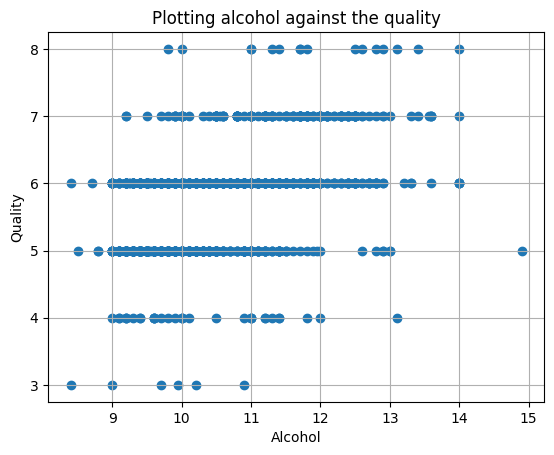

In [49]:
plt.scatter(df['alcohol'],df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Plotting alcohol against the quality')
plt.grid(True)
plt.show()

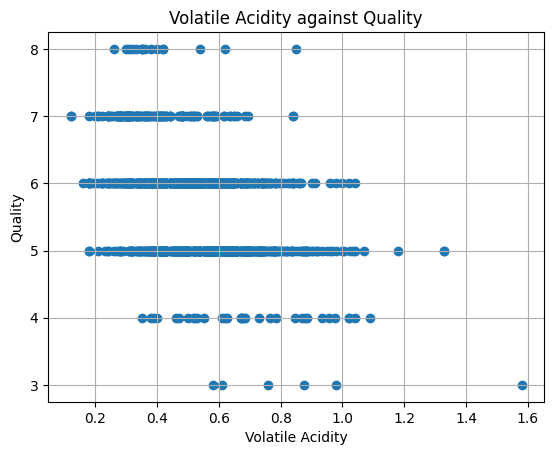

In [50]:
plt.scatter(df['volatile acidity'],df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity against Quality')
plt.grid(True)
plt.show()

In [51]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [52]:
X = df[list(df.columns)[:-1]]

In [53]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [54]:
Y = df['quality']

In [55]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [57]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
Y_prediction = regressor.predict(X_test)

In [58]:
Y_prediction

array([6., 6., 5., 5., 5., 6., 6., 7., 4., 6., 5., 6., 5., 6., 6., 5., 6.,
       5., 7., 5., 6., 6., 6., 6., 5., 5., 5., 5., 6., 5., 6., 6., 5., 7.,
       5., 6., 7., 6., 5., 6., 6., 7., 5., 7., 5., 8., 6., 5., 6., 5., 5.,
       5., 5., 7., 6., 5., 6., 5., 6., 6., 5., 5., 7., 5., 6., 6., 5., 5.,
       6., 8., 6., 5., 5., 4., 4., 5., 7., 7., 6., 5., 5., 6., 6., 8., 5.,
       6., 5., 5., 6., 5., 5., 5., 5., 7., 7., 5., 6., 6., 5., 6., 5., 6.,
       5., 5., 6., 5., 5., 6., 7., 5., 5., 6., 6., 7., 7., 6., 5., 5., 5.,
       5., 6., 6., 6., 6., 7., 5., 6., 6., 5., 6., 6., 6., 6., 6., 6., 7.,
       6., 6., 5., 6., 5., 6., 6., 6., 5., 6., 6., 5., 6., 4., 6., 5., 5.,
       5., 6., 5., 5., 5., 7., 4., 5., 5., 5., 6., 7., 6., 7., 6., 7., 7.,
       5., 7., 7., 6., 6., 6., 6., 6., 5., 6., 6., 6., 5., 5., 5., 4., 6.,
       6., 5., 6., 5., 6., 5., 6., 7., 6., 6., 7., 5., 5., 6., 6., 6., 7.,
       5., 5., 5., 7., 5., 5., 6., 7., 5., 6., 6., 5., 6., 6., 6., 6., 6.,
       5., 5., 6., 6., 7.

In [59]:
print('R-score is %s'%regressor.score(X_test,Y_test))

R-score is 1.0


In [60]:
regressor1 = LinearRegression()
scores = cross_val_score(regressor1,X,Y,cv=5)

In [61]:
print(scores.mean())

1.0


In [62]:
print(scores)

[1. 1. 1. 1. 1.]
